# Import 

In [ ]:
from google.colab import files
import pandas as pd
import numpy as np

scores = []

In [ ]:
# upload the dataset file (.csv)
uploaded = files.upload()

Saving Breast_cancer_data.csv to Breast_cancer_data.csv
Saving Depression.csv to Depression.csv
Saving Diabetes.csv to Diabetes.csv
Saving Heart.csv to Heart.csv


# Processing data (Choose depression + 1 of 3 datasets)

## Depression data (Test)


In [ ]:
# use pd get the size of the dataset
depression = pd.read_csv("Depression.csv")

# # of row, # of col
print(len(depression.axes[0]), len(depression.axes[1]))


1429 12


In [ ]:
# open the file and read the data
f = open('Depression.csv', 'r')
rawdata = f.read()
f.close()

# split the whole data(string) by \n, and delete the first row(titlea)
rawdata = rawdata.split("\n")
rawdata = rawdata[1:100]
rawdata = [r.split(',') for r in rawdata]
# pop the last row, which is generated by split ','
rawdata.pop()

# store the features and labels by samples
target_features = []
target_label = []

# store the overall data before split into features and labels
sample = []

# float or int is the only input format for NN
for r in rawdata:
    feature = [] 
    for c in r:
      if c !='':
        feature.append(float(c))
      else:
        feature.append(float(0))
    sample.append(feature)


target_features = np.array([x[:-1] for x in sample])
target_label = np.array([x[-1] for x in sample])


In [ ]:
x, y = target_features.shape
print(target_features.shape)
print(target_label.size)
add_np = np.random.randint(2, size=(x,13-y))
target_features = np.append(target_features, add_np, axis = 1)
print(target_features.shape)

(98, 11)
98
(98, 13)


## Diabetes data


In [ ]:
diabetes = pd.read_csv("Diabetes.csv")

print(len(diabetes.axes[0]), len(diabetes.axes[1]))


768 11


In [ ]:
f = open('Diabetes.csv', 'r')
rawdata = f.read()
f.close()

rawdata = rawdata.split("\n")
rawdata = rawdata[1:]
rawdata = [r.split(',') for r in rawdata]
rawdata.pop()


source_features = []
source_label = []
sample = []

for r in rawdata:
    feature = [] 
    for c in r:
      if c !='':
        feature.append(float(c))
      else:
        feature.append(float(0))
    sample.append(feature)

source_features = np.array([x[:-1] for x in sample])
source_label = np.array([x[-1] for x in sample])



In [ ]:
print(source_features.shape)
print(source_label.size)
x, y = source_features.shape
add_np = np.random.randint(2, size=(x,13-y))
source_features = np.append(source_features, add_np, axis = 1)
print(source_features.shape)

(768, 10)
768
(768, 13)


## Heart data


In [ ]:
Heart = pd.read_csv("Heart.csv")

print(len(Heart.axes[0]), len(Heart.axes[1]))


303 14


In [ ]:
f = open('Heart.csv', 'r')
rawdata = f.read()
f.close()

rawdata = rawdata.split("\n")
rawdata = rawdata[1:]
rawdata = [r.split(',') for r in rawdata]
rawdata.pop()

source_features = []
source_label = []
sample = []

for r in rawdata:
    feature = [] 
    for c in r:
      if c !='':
        feature.append(float(c))
    sample.append(feature)

source_features = np.array([x[:-1] for x in sample])
source_label = np.array([x[-1] for x in sample])

In [ ]:
print(source_features.shape)
print(source_label.size)

(303, 13)
303


In [ ]:
x, y = source_features.shape
add_np = np.random.randint(2, size=(x,13-y))
source_features = np.append(source_features, add_np, axis = 1)
print(source_features.shape)

(303, 13)


## Breast cancer data


In [ ]:
Breast = pd.read_csv("Breast_cancer_data.csv")

print(len(Breast.axes[0]), len(Breast.axes[1]))


569 11


In [ ]:
f = open('Breast_cancer_data.csv', 'r')
rawdata = f.read()
f.close()

rawdata = rawdata.split("\n")
rawdata = rawdata[1:]
rawdata = [r.split(',') for r in rawdata]
rawdata.pop()

source_features = []
source_label = []
sample = []

for r in rawdata:
    feature = [] 
    for c in r:
      if c !='':
        feature.append(float(c))
    sample.append(feature)

source_features = np.array([x[:-1] for x in sample])
source_label = np.array([x[-1] for x in sample])


In [ ]:
print(source_features.shape)
print(source_label.size)

(569, 10)
569


In [ ]:
x, y = source_features.shape
add_np = np.random.randint(2, size=(x,14-y))
source_features = np.append(source_features, add_np, axis = 1)
print(source_features.shape)

(569, 14)


## Depression data (Train)

In [ ]:
# use pd get the size of the dataset
depression = pd.read_csv("Depression.csv")

# # of row, # of col
print(len(depression.axes[0]), len(depression.axes[1]))


1429 12


In [ ]:
# open the file and read the data
f = open('Depression.csv', 'r')
rawdata = f.read()
f.close()

# split the whole data(string) by \n, and delete the first row(titlea)
rawdata = rawdata.split("\n")
rawdata = rawdata[101:]
rawdata = [r.split(',') for r in rawdata]
# pop the last row, which is generated by split ','
rawdata.pop()

source_features = []
source_label = []
sample = []

# float or int is the only input format for NN
for r in rawdata:
    feature = [] 
    for c in r:
      if c !='':
        feature.append(float(c))
      else:
        feature.append(float(0))
    sample.append(feature)


source_features = np.array([x[:-1] for x in sample])
source_label = np.array([x[-1] for x in sample])


In [ ]:
x, y = source_features.shape
print(source_features.shape)
print(source_label.size)
add_np = np.random.randint(2, size=(x,13-y))
source_features = np.append(source_features, add_np, axis = 1)
print(source_features.shape)

(1329, 11)
1329
(1329, 14)


# Transfer learning

In [ ]:
# Libraries
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from tensorflow.keras import layers
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LogisticRegression

In [ ]:
model = keras.Sequential()
# input diabetes data
model.add(keras.Input(shape = (13,), name='input'))
model.add(layers.Dense(20,activation='relu', name='Hid_1'))
model.add(layers.Dense(15,activation='relu', name='Hid_2'))
model.add(layers.Dense(10,activation='relu', name='Hid_3'))
model.add(layers.Dense(2,activation='sigmoid', name='output'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hid_1 (Dense)               (None, 20)                280       
                                                                 
 Hid_2 (Dense)               (None, 15)                315       
                                                                 
 Hid_3 (Dense)               (None, 10)                160       
                                                                 
 output (Dense)              (None, 2)                 22        
                                                                 
Total params: 777
Trainable params: 777
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(source_features, source_label, epochs=10)

Epoch 1/10
24/24 [==============================] - 1s 2ms/step - loss: 2.2361 - accuracy: 0.5169
Epoch 2/10
24/24 [==============================] - 0s 2ms/step - loss: 0.9066 - accuracy: 0.6250
Epoch 3/10
24/24 [==============================] - 0s 2ms/step - loss: 0.7843 - accuracy: 0.6523
Epoch 4/10
24/24 [==============================] - 0s 2ms/step - loss: 0.6997 - accuracy: 0.6602
Epoch 5/10
24/24 [==============================] - 0s 2ms/step - loss: 0.6539 - accuracy: 0.6654
Epoch 6/10
24/24 [==============================] - 0s 2ms/step - loss: 0.6387 - accuracy: 0.6693
Epoch 7/10
24/24 [==============================] - 0s 2ms/step - loss: 0.6419 - accuracy: 0.6602
Epoch 8/10
24/24 [==============================] - 0s 2ms/step - loss: 0.6202 - accuracy: 0.6810
Epoch 9/10
24/24 [==============================] - 0s 3ms/step - loss: 0.6051 - accuracy: 0.6849
Epoch 10/10
24/24 [==============================] - 0s 3ms/step - loss: 0.5849 - accuracy: 0.6966


In [ ]:
accurary_train = []
accurary_test = []
sample_train = []
sample_test = []
label_train = []
label_test = []

# default value split into 5 folders and repeat 10 times
CV = RepeatedKFold()

for train_index, test_index in CV.split(source_features):
  sample_train,sample_test = source_features[train_index],source_features[test_index]
  label_train, label_test = source_label[train_index],source_label[test_index]
  accurary_train.append(model.fit(sample_train, label_train))
  accurary_test.append(model.fit(sample_test, label_test))

5/5 [==============================] - 0s 4ms/step - loss: 0.4974 - accuracy: 0.7451


In [ ]:
#LR.fit(target_features,target_label)
loss, accuracy = model.evaluate(target_features, target_label)
accuracy

4/4 [==============================] - 0s 3ms/step - loss: 0.7405 - accuracy: 0.5612


0.5612244606018066

In [ ]:
# Extract vectors and apply kmeans
print(target_label)
output = model.predict(target_features)
print(output)


[0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1.
 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0.
 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0.
 0. 1.]
[[0.77980375 0.7783916 ]
 [0.77276933 0.70521384]
 [0.7668694  0.679341  ]
 [0.7562368  0.70020306]
 [0.81286967 0.95034873]
 [0.78436255 0.8671342 ]
 [0.7747756  0.7623066 ]
 [0.75233144 0.63065535]
 [0.79958713 0.8905959 ]
 [0.7781118  0.7814836 ]
 [0.846509   0.9902331 ]
 [0.79551095 0.93467975]
 [0.79638994 0.8674325 ]
 [0.7694248  0.75905347]
 [0.7906344  0.91238374]
 [0.7571513  0.6810651 ]
 [0.760159   0.71176076]
 [0.7975813  0.90114   ]
 [0.78204966 0.80536   ]
 [0.75823426 0.6990392 ]
 [0.7914165  0.8464956 ]
 [0.79440236 0.9126432 ]
 [0.77546275 0.808066  ]
 [0.81239355 0.92694557]
 [0.80614775 0.9200815 ]
 [0.7664515  0.7453525 ]
 [0.8151207  0.9420956 ]
 [0.7633615  0.7104957 ]


In [ ]:
output = np.array(output)
data = pd.DataFrame(output, columns = ['transfer_depression_0','transfer_depression_1'])
data['transfer_output'] = np.argmax(output,axis=1)
data

,transfer_depression_0,transfer_depression_1,transfer_output
0,0.779804,0.778392,0
1,0.772769,0.705214,0
2,0.766869,0.679341,0
3,0.756237,0.700203,0
4,0.812870,0.950349,1
...,...,...,...
93,0.766462,0.692476,0
94,0.768123,0.826209,1
95,0.763640,0.660015,0
96,0.758290,0.700311,0


In [ ]:
import os
data.to_csv('depression_kmeans.csv')


# Parallel K-means

In [ ]:
import math
import csv
import time
import numpy as np
import collections
!pip install mpi4py
from mpi4py import MPI
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import adjusted_rand_score


In [ ]:
# Devide data set to further scattering
def chunkIt(seq, num):
    avg = len(seq) / float(num)
    out = []
    last = 0.0

    while last < len(seq):
        out.append(seq[int(last):int(last + avg)])
        last += avg
    return out
# Count lables for recalculating means of centroids 	
def addCounter(counter1, counter2, datatype):
    for item in counter2:
        counter1[item] += counter2[item]
    return counter1

comm = MPI.COMM_WORLD
size = comm.Get_size()
rank = comm.Get_rank()

In [ ]:

global dimensions, num_clusters, num_points,dimensions,data,flag
num_clusters=0

if rank==0: 													#master part									
	num_clusters = int(2)
	start_time = time.time() 
 
	with open('depression_kmeans.csv','r') as f:
		reader = csv.reader(f)
		data = list(reader)
		
	data.pop(0)
	for i in range (len(data)):
		data[i].pop(0)
	data=data[0:]
	data=np.array(data).astype(np.float)

	kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(data).labels_
	
	# Initialize centroids matrix
	initial=[]
	for i in range(num_clusters):
		initial.append(data[i])
	initial=np.vstack(initial)

	#number of rows
	num_points = len(data)  
  #number of columns                                  
	dimensions = len(data[0])   

	# deviding data set on parts for further scattering
	chunks=chunkIt(data,size)								  

#workers part
#initilize variable
else:														
	chunks = None											  
	initial = None											  
	data = None											     
	dimensions = None										 
	num_points = None										  
	cluster= None											 
	Q_clust= None											 
	num_clusters= None									
	centroid=None
	kmeans= None
	start_time=None
	
start_time=comm.bcast(start_time,root=0)

#send chunks of data set to the workers
data=comm.scatter(chunks, root=0)							  
num_clusters=comm.bcast(num_clusters,root=0)

#send centroid matrix to the workers
initial=comm.bcast(initial, root = 0)						  
flag= True

while flag==True:
	clusters=[]											  		  #initilize variable
	cluster=[]
	# Calculating dist matrix in each process
	dist =np.zeros((len(data),len(initial)))


	for j in range(len(initial)):
		for i in range(len(data)):
			dist[i][j]=np.linalg.norm(initial[j]-data[i])	
	# Initilize lable for each sample in each process

	#iterable take each raw in dist matrix and 
	for i in range (len(dist)):									
		clusters.append(np.argmin(dist[i])+1)                      
	#print("find column index of min value (the index is the number of centorud)")
	#print(clusters)
 
	#Calculating the number of samples in each cluster
	Q_clusts=collections.Counter(clusters)	
 						
	# Summing the number of samples for each cluster
	counterSumOp = MPI.Op.Create(addCounter, commute=True)

	totcounter = comm.allreduce(Q_clusts, op=counterSumOp)
	comm.Barrier()
	#print('Q',Q_clusts)
	#print('T',totcounter)

	# From each worker we gather cluster vector and join them
	cluster=comm.gather(clusters, root=0)
	comm.Barrier()
	if rank==0:
		cluster=[item for sublist in cluster for item in sublist]


	centroids=np.zeros((len(initial),len(initial[0])))
	for k in range (1,num_clusters+1):
		indices = [i for i, j in enumerate(clusters) if j == k]
		centroids[k-1]=np.divide((np.sum([data[i] for i in indices], axis=0)).astype(np.float),totcounter[k])

	centroid=comm.allreduce(centroids,MPI.SUM)
	comm.Barrier()
	#print('centroids',centroids)
	#print ('initial', initial)
	#print('centroid',centroid)
		
	
	if np.all(centroid==initial):
		flag=False
		#print ("Execution time %s seconds" % (time.time() - start_time))
		
	else:
	#	print ('initial after', initial)
		initial= centroid 
	comm.Barrier()


if rank==0:
	print('final clust vect',cluster)
	print('libkms clust vect',kmeans)



			

		

final clust vect [2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 2, 2, 1, 2, 1, 1, 2, 1, 2, 2, 1]
libkms clust vect [1 1 1 1 0 0 1 1 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 1 0 1 1 0 1 0 0 1 1 1 1
 1 0 0 1 0 1 1 0 1 1 1 0 1 1 1 0 0 0 1 1 0 0 1 0 1 1 0 0 1 1 0 1 1 0 0 0 1
 0 1 0 0 0 1 0 1 1 1 0 0 0 1 1 0 1 0 0 1 0 1 1 0]


In [ ]:
cluster_np = np.array(cluster)

In [ ]:
centroids

array([[0.79232069, 0.87240643, 1.        ],
       [0.76188172, 0.6918207 , 0.        ]])

In [ ]:
cluster_np

array([2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1,
       1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2,
       1, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 2, 2, 1, 1, 2,
       2, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 2,
       2, 1, 2, 1, 1, 2, 1, 2, 2, 1])

In [ ]:
target_label

array([0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0.,
       0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1.])

# Results

## Parallel K-Means

<function matplotlib.pyplot.colorbar>

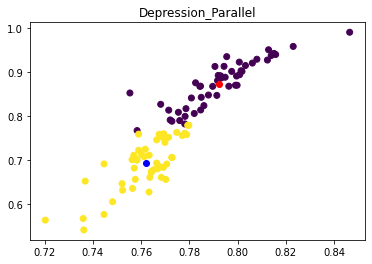

In [ ]:
#data_np = data.to_numpy()
plt.scatter(data[:,0], data[:,1], c=cluster_np[:] )
plt.scatter(centroids[0][0],centroids[0][1], c = 'red')
plt.scatter(centroids[1][0],centroids[1][1], c = 'blue')
plt.title("Depression_Parallel")
plt.colorbar

## Original Labels

<function matplotlib.pyplot.colorbar>

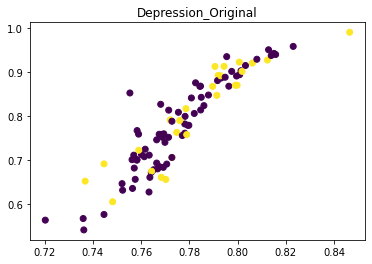

In [ ]:
plt.scatter(data[:,0], data[:,1], c=target_label )
plt.title("Depression_Original")
plt.colorbar

## Correct number

In [ ]:
score = 0
(nums, values)= data.shape
for i in cluster_np:
  if cluster_np[i] * 1.0 == target_label[i] +1:
    score = score + 1

score = score/nums 
print("the accuracy of this model is (Parallel K-Means/Original labels): {}".format(score))

the accuracy of this model is (Parallel K-Means/Original labels): 0.5


In [ ]:
scores.append(score)
scores

[0.7244897959183674, 0.5]